# On the training data, train a Decision Tree Classifier.

In [7]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Data Reading

In [8]:
churnData = pd.read_csv('/Users/edudarrelljockers/Documents/GitHub/IH_RH_DA_FT_AUG_2021/Class Materials/Machine_Learning/Supervised_Learning/Lab/Data/DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### Target Classes from the Original Data

In [9]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Processing Data

In [10]:
churnData.dtypes
churnData['TotalCharges']  = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.isna().sum()
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

## Making the model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.30)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)
y_pred_test

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


Confusion matrix for the train set
[[3339  756]
 [ 294  541]]


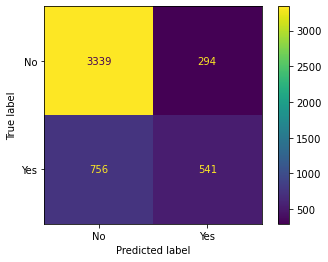



Confusion matrix for the test set
[[1433  360]
 [ 108  212]]


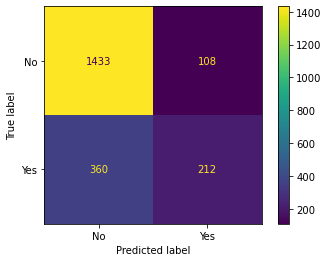

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Keep in mind that sklearn has a distinct function for decision trees.
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

#prob_pred_test_dt = model.predict_proba(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]}) #churn yes)

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

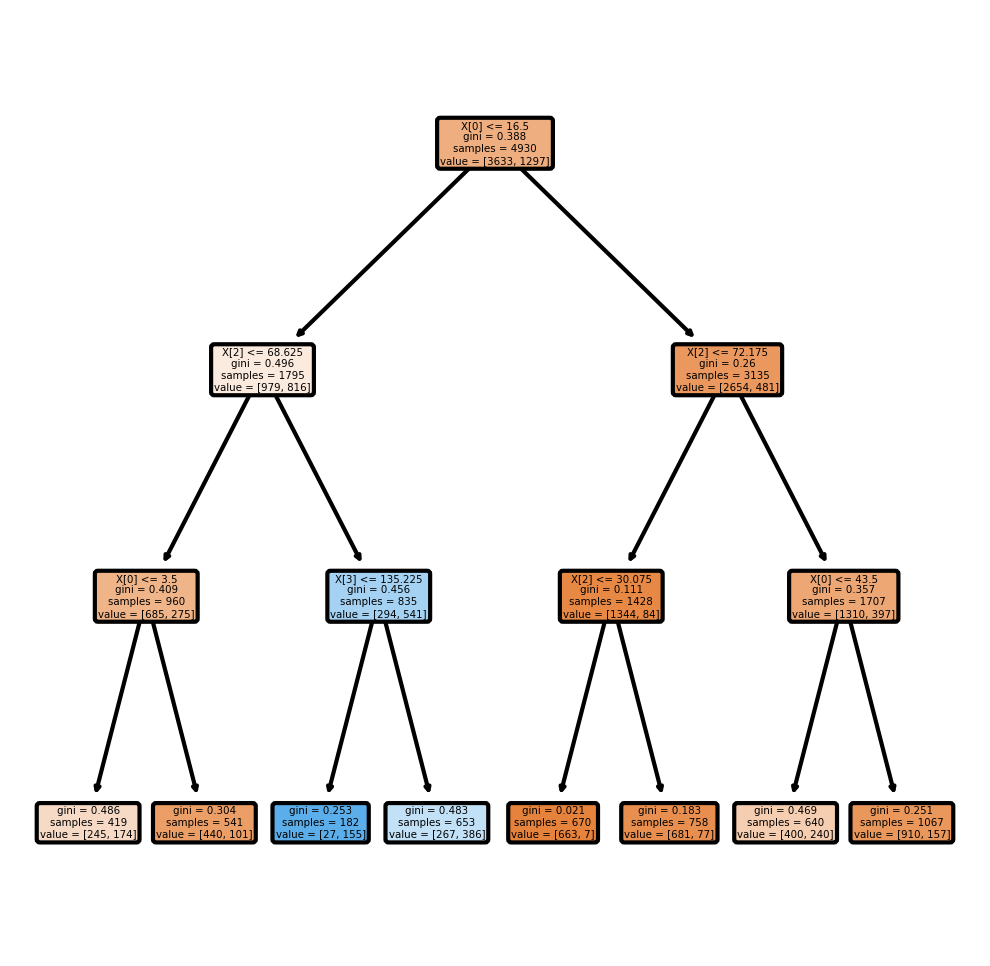

In [14]:
#customer churn -> Yes 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True)
plt.show()

In [15]:
X_train #x0-> tenure X2:monthly charges #x3totalcharges

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
3993,70,0,66.00,4891.50
3148,47,0,75.45,3545.10
3531,16,0,19.35,295.55
4403,32,0,62.45,2045.55
1859,52,0,85.35,4338.60
...,...,...,...,...
1293,67,0,111.20,7530.80
4023,42,0,19.80,849.90
5200,70,0,106.50,7397.00
3775,41,1,98.40,4187.75
